In [11]:
import logging
import os

import boto3

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s %(message)s')

In [18]:
for k in ('http_proxy', 'https_proxy'):
    try:
        del os.environ[k]
    except KeyError:
        pass
    try:
        del os.environ[k.upper()]
    except KeyError:
        pass
    
os.environ['AWS_ENDPOINT']='136.156.133.10:80'

In [20]:
s3 = boto3.client('s3', endpoint_url='http://%(AWS_ENDPOINT)s' % os.environ)
objs = s3.list_objects(Bucket='eccharts-fields')


2019-06-25 12:55:35,088 Event choose-service-name: calling handler <function handle_service_name_alias at 0x7f30c9918ea0>
2019-06-25 12:55:35,090 Event creating-client-class.s3: calling handler <function add_generate_presigned_post at 0x7f30c9957620>
2019-06-25 12:55:35,091 Event creating-client-class.s3: calling handler <function lazy_call.<locals>._handler at 0x7f30d80f4ea0>
2019-06-25 12:55:35,092 Event creating-client-class.s3: calling handler <function add_generate_presigned_url at 0x7f30c9957400>
2019-06-25 12:55:35,092 The s3 config key is not a dictionary type, ignoring its value of: None
2019-06-25 12:55:35,095 Setting s3 timeout as (60, 60)
2019-06-25 12:55:35,097 Registering retry handlers for service: s3
2019-06-25 12:55:35,098 Using S3 path style addressing.
2019-06-25 12:55:35,099 Event before-parameter-build.s3.ListObjects: calling handler <function set_list_objects_encoding_type_url at 0x7f30c9938950>
2019-06-25 12:55:35,100 Event before-parameter-build.s3.ListObjects: 

In [25]:
object_name = objs['Contents'][0]['Key']

s3.download_file('eccharts-fields', object_name, '/tmp/foo.grib')
os.stat('/tmp/foo.grib')

2019-06-25 13:00:39,539 Acquiring 0
2019-06-25 13:00:39,541 DownloadSubmissionTask(transfer_id=0, {'transfer_future': <s3transfer.futures.TransferFuture object at 0x7f30c8d90550>}) about to wait for the following futures []
2019-06-25 13:00:39,542 DownloadSubmissionTask(transfer_id=0, {'transfer_future': <s3transfer.futures.TransferFuture object at 0x7f30c8d90550>}) done waiting for dependent futures
2019-06-25 13:00:39,543 Executing task DownloadSubmissionTask(transfer_id=0, {'transfer_future': <s3transfer.futures.TransferFuture object at 0x7f30c8d90550>}) with kwargs {'client': <botocore.client.S3 object at 0x7f30c8d6f3c8>, 'config': <boto3.s3.transfer.TransferConfig object at 0x7f30c8d16400>, 'osutil': <s3transfer.utils.OSUtils object at 0x7f30c8d16390>, 'request_executor': <s3transfer.futures.BoundedExecutor object at 0x7f30c8d160b8>, 'transfer_future': <s3transfer.futures.TransferFuture object at 0x7f30c8d90550>, 'io_executor': <s3transfer.futures.BoundedExecutor object at 0x7f30c

os.stat_result(st_mode=33188, st_ino=281981, st_dev=189, st_nlink=1, st_uid=1000, st_gid=100, st_size=206954154, st_atime=1561467639, st_mtime=1561467643, st_ctime=1561467643)

In [26]:
objs['Contents'][0]

{'Key': 'C1D06241200062412001',
 'LastModified': datetime.datetime(2019, 6, 24, 17, 4, 4, 422000, tzinfo=tzlocal()),
 'ETag': '"95daffb23cbd4b8d9af3485e66155be2"',
 'Size': 206954154,
 'StorageClass': 'STANDARD',
 'Owner': {'DisplayName': 'default-user', 'ID': 'default-user'}}

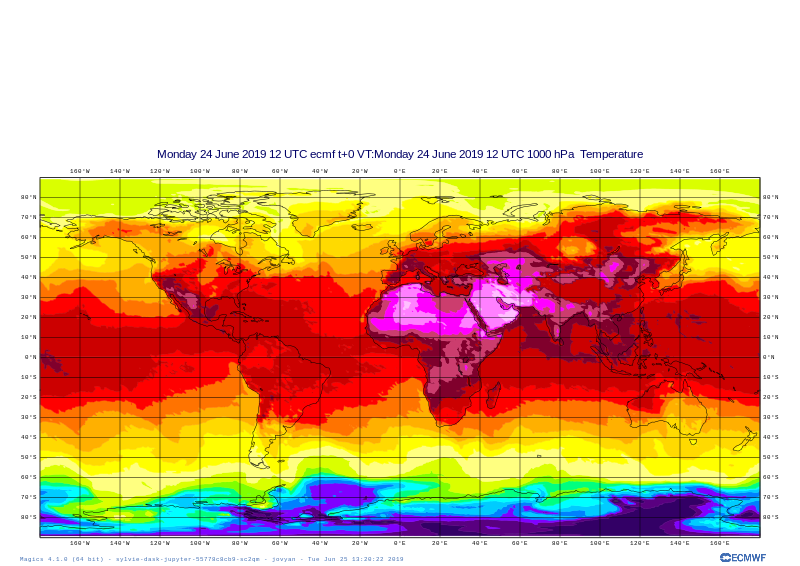

In [32]:
from Magics import macro as magics

grib = magics.mgrib(grib_input_file_name = '/tmp/foo.grib', grib_field_position=3)
contour = magics.mcont(contour_automatic_setting = 'ecmwf')

magics.plot(grib, contour, magics.mtext(), magics.mcoast())